In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Exploratory Data Analysis (EDA)**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\ukaro\Desktop\Projects\zomato banglore (python)\zomato dataset raw.csv",encoding="unicode escape")

In [4]:
df.shape
#to see the number of rows,columns

(51717, 17)

In [5]:
df.count()
#count the non null values in each column

url                            51717
address                        51717
name                           51717
online_order                   51717
book_table                     51717
rate                           43942
votes                          51717
phone                          50509
location                       51696
rest_type                      51490
dish_liked                     23639
cuisines                       51672
approx_cost(for two people)    51371
reviews_list                   51717
menu_item                      51717
listed_in(type)                51717
listed_in(city)                51717
dtype: int64

In [6]:
df.columns
#see the columns in df

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df=df.drop(["url","address","phone","dish_liked","reviews_list","listed_in(city)","menu_item"],axis=1)
#dropping the unimportant columns eg url,phone,etc address & listed_in(city) is already present in location column
#axis=1 is column axis & axis=0 is row axis
df.head()
#overview of the table.shows default 5 rows as the number of rows to be displayed is not written


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [8]:
df.info()
#gives info about our data like non null counts & datatypes
#rate,location,rest_type,cuisines & approx cost column have some null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [9]:
df.drop_duplicates(inplace=True)
#removing duplicates
#inplace=True is to replace the existing dataframe and not create a new one to avoid double memory usage i.e.make the changes permanent
df.shape

(35011, 10)

In [10]:
df["rate"].unique()
#to see different values in the rate column. It has some "NEW","-",nan

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
def cleaning_rate(value):
    if value=="NEW" or value=="-":
        return np.nan
    else:
        value=str(value).split("/")
        value=value[0]
        return float(value)
df["rate"]=df["rate"].apply(cleaning_rate)
#cleaning of rate column = Converted the NEW and - to null values, splitted the rest values with delimiter "/" and kept the index=0 of that str and converted it to float value as we will apply some mathematical properties on them like mean,etc


In [12]:
df["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [13]:
df.isnull().sum()
#to get the sum of rows with null values

name                              0
online_order                      0
book_table                        0
rate                           5097
votes                             0
location                         14
rest_type                       156
cuisines                         33
approx_cost(for two people)     221
listed_in(type)                   0
dtype: int64

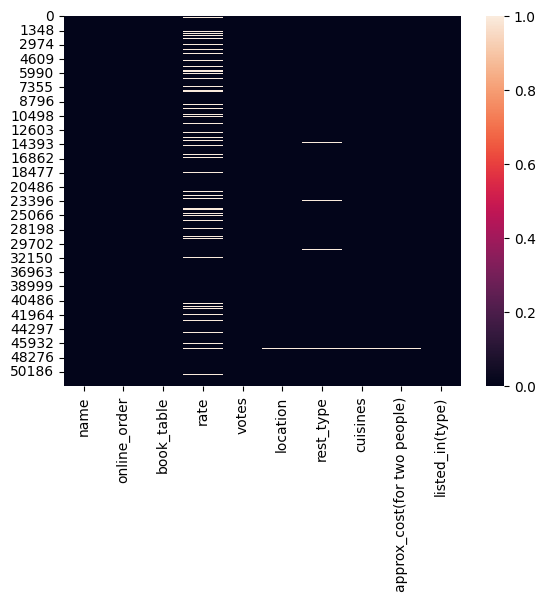

In [14]:
sns.heatmap(df.isnull())
plt.show()
#shows the distribution of null values.white region means null value

In [15]:
df["rate"].fillna(df["rate"].mean(),inplace=True)
#filled the null values in rate column with the mean of the column

In [16]:
df.dropna(inplace=True)
#fixing null containing rows. deleted them for rest of the columns

In [17]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [18]:
df.dtypes
#knowing the datatype of each column

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
location                        object
rest_type                       object
cuisines                        object
approx_cost(for two people)     object
listed_in(type)                 object
dtype: object

In [19]:
df.votes=pd.to_numeric(df.votes)
#converting votes column to numeric datatype which is by default int64 or float64
df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
location                        object
rest_type                       object
cuisines                        object
approx_cost(for two people)     object
listed_in(type)                 object
dtype: object

In [20]:
df.rename(columns={"approx_cost(for two people)":"cost_for_2","listed_in(type)":"type"},inplace=True)
#chaning the name of columns & making them shorter
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [21]:
df["cost_for_2"].unique()
#see the unique values in the column

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [22]:
def removing_comma(value):
    value=str(value)
    if "," in value:
        value=value.replace(",","")
        return float(value)
    else:
        return float(value)
df["cost_for_2"]=df["cost_for_2"].apply(removing_comma)

df["cost_for_2"].unique()
#removed the "," and then converted them to float 

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [23]:
df.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [24]:
df.rest_type.value_counts()
#shows unique values and their count

rest_type
Quick Bites                   12123
Casual Dining                  7533
Cafe                           2578
Delivery                       1502
Dessert Parlor                 1491
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Mess, Quick Bites                 1
Dessert Parlor, Food Court        1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [25]:
rest_type_count=df.rest_type.value_counts(ascending=False)

In [26]:
count_less_than_1000=rest_type_count[rest_type_count<1000]
#filtering to get the rest_types with count less than 1000 (1000 is just used as 10% of the value nothing specific)

In [27]:
len(count_less_than_1000)
# 87 rest_types have lower count.

87

In [28]:
def simplify_rest(value):
    if value in count_less_than_1000:
        return "others"
    else:
        return value

df.rest_type=df.rest_type.apply(simplify_rest)
# combined all rest_type values present in count_less_than_1000 to others 
df.rest_type.value_counts()

rest_type
Quick Bites           12123
others                 8193
Casual Dining          7533
Cafe                   2578
Delivery               1502
Dessert Parlor         1491
Takeaway, Delivery     1216
Name: count, dtype: int64

In [29]:
df.location.value_counts()

location
BTM                     2484
Whitefield              1945
HSR                     1753
Indiranagar             1747
Marathahalli            1649
                        ... 
Yelahanka                  5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: count, Length: 93, dtype: int64

In [30]:
location_count=df.location.value_counts()
location_count_lessthan500=location_count[location_count<500]
def simplify_location(value):
    if value in location_count_lessthan500:
        return "others"
    else:
        return value
df.location=df.location.apply(simplify_location)
#used filtering to have locations with count<500 and if df.location column is present in that then combined it to others
df.location.value_counts()

location
others                   9476
BTM                      2484
Whitefield               1945
HSR                      1753
Indiranagar              1747
Marathahalli             1649
Koramangala 5th Block    1605
JP Nagar                 1400
Jayanagar                1242
Electronic City          1212
Bellandur                1120
Bannerghatta Road        1052
Sarjapur Road             933
Brigade Road              687
Koramangala 7th Block     624
Brookefield               598
Koramangala 6th Block     590
Koramangala 4th Block     587
Kalyan Nagar              584
New BEL Road              582
Banashankari              571
Malleshwaram              556
MG Road                   554
Ulsoor                    546
Koramangala 1st Block     539
Name: count, dtype: int64

In [31]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost_for_2', 'type'],
      dtype='object')

In [32]:
df.cuisines.value_counts()

cuisines
North Indian                                   1895
North Indian, Chinese                          1561
South Indian                                   1172
Bakery, Desserts                                591
Biryani                                         557
                                               ... 
Salad, Juices                                     1
Pizza, Italian, Chinese, Rolls, Biryani           1
Burger, Juices                                    1
North Indian, Fast Food, Biryani, Beverages       1
North Indian, Chinese, Arabian, Momos             1
Name: count, Length: 2704, dtype: int64

In [33]:
cuisines_count=df.cuisines.value_counts()
cuisines_count_lessthan200=cuisines_count[cuisines_count<200]

def simplify_cuisines(value):
    if value in cuisines_count_lessthan200:
        return "others"
    else:
        return value

df.cuisines=df.cuisines.apply(simplify_cuisines)

df.cuisines.value_counts()

cuisines
others                                 24174
North Indian                            1895
North Indian, Chinese                   1561
South Indian                            1172
Bakery, Desserts                         591
Biryani                                  557
Fast Food                                485
South Indian, North Indian, Chinese      475
Cafe                                     447
Desserts                                 447
Bakery                                   385
Chinese                                  337
Ice Cream, Desserts                      304
Mithai, Street Food                      256
Chinese, North Indian                    249
North Indian, Chinese, Biryani           234
Desserts, Ice Cream                      226
North Indian, South Indian               222
North Indian, South Indian, Chinese      212
South Indian, North Indian               207
Finger Food                              200
Name: count, dtype: int64

In [34]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,others,Casual Dining,others,600.0,Buffet


In [35]:
df.online_order.unique()
#just checking the rest of the columns for irregulaties

array(['Yes', 'No'], dtype=object)

In [36]:
df.book_table.unique()

array(['Yes', 'No'], dtype=object)

In [37]:
df.type.value_counts()

type
Delivery              15995
Dine-out              12783
Desserts               2452
Cafes                  1238
Drinks & nightlife      902
Buffet                  669
Pubs and bars           597
Name: count, dtype: int64

In [38]:
df.describe()
#show details/description of columns eg count,max,mean,etc

,rate,votes,cost_for_2
count,34636.000000,34636.000000,34636.000000
mean,3.732509,364.580783,594.281586
std,0.418292,943.930630,463.014958
min,1.800000,0.000000,40.000000
25%,3.500000,11.000000,300.000000
50%,3.730491,59.000000,450.000000
75%,4.000000,273.000000,700.000000
max,4.900000,16832.000000,6000.000000


# Visualization

**countplot for locations :**

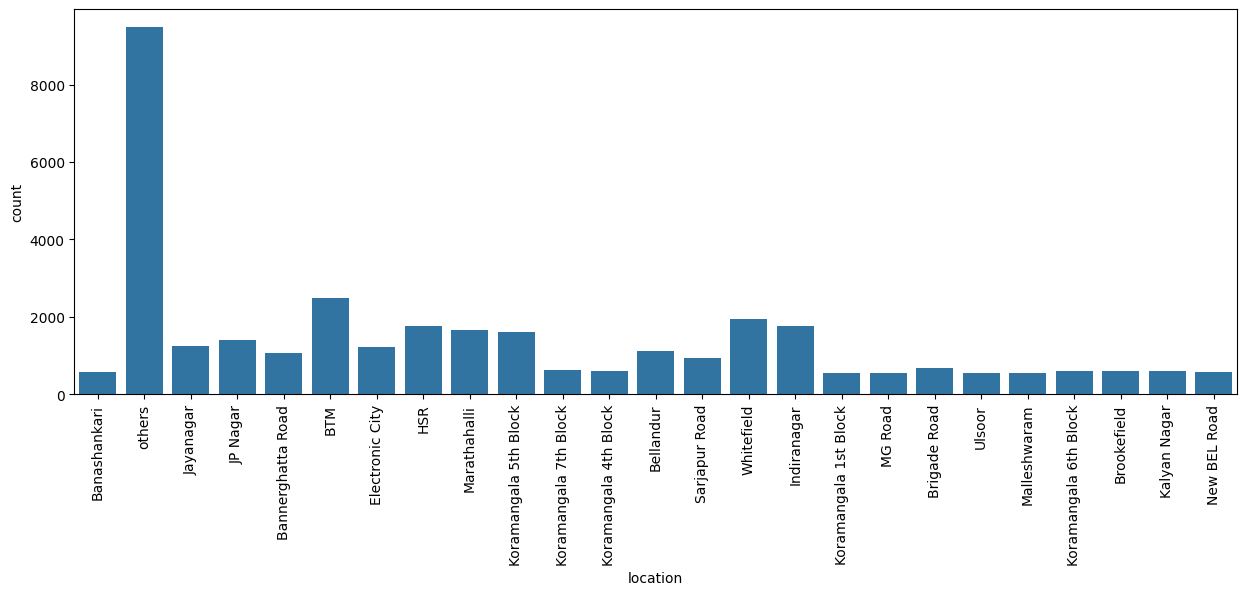

In [39]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
ax=sns.countplot(x=df.location)
#xticks rotation used to avoid overlapping of x-axis labels

can used to spot the locations where number of restaurants is very less and make an informed decision of opening a new restaurant at that location plus also checking locations where populations and purchasing power of people is also high for a profitable venture

**countplot of restaurants with online_order facility :**

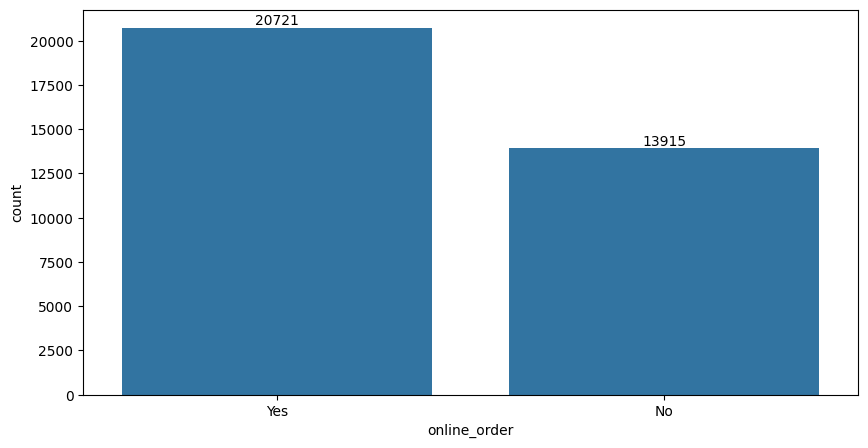

In [40]:
plt.figure(figsize=(10,5))
#counts the number of entries of different online_order data in the dataframe and show it as a bar chart
ax=sns.countplot(x=df.online_order)
#for data labels
for value in ax.containers:
    ax.bar_label(value)


**countplot of restaurants with booktable facility :**

<Axes: xlabel='book_table', ylabel='count'>

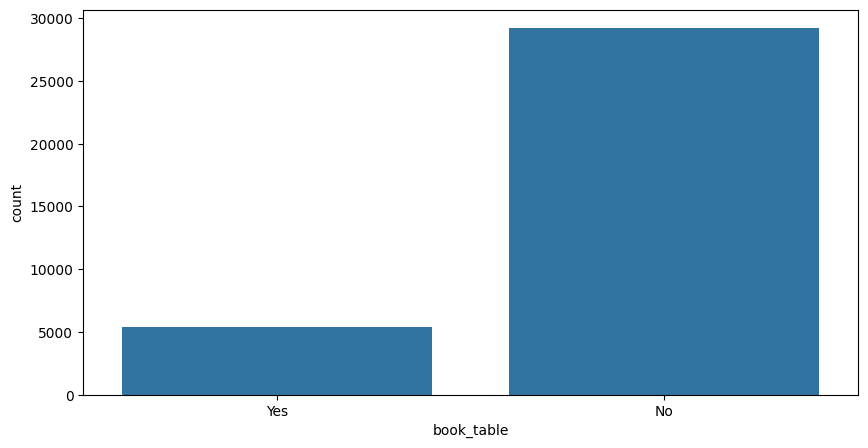

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.book_table)

**online_order vs rate :**

<Axes: xlabel='online_order', ylabel='rate'>

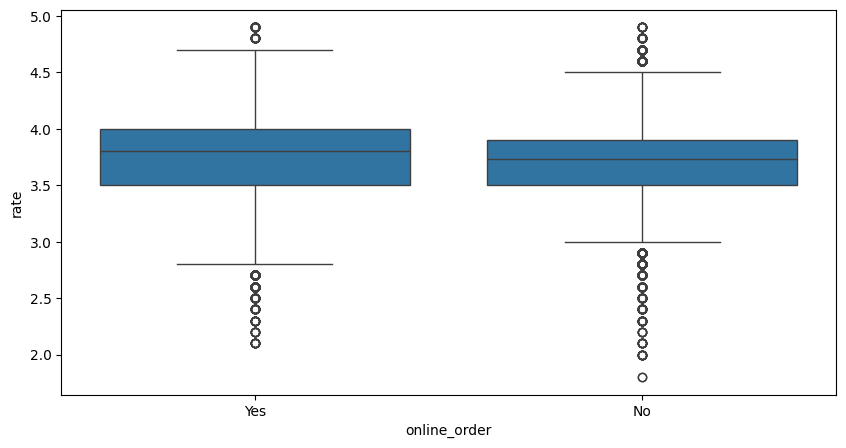

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.online_order,y=df.rate)

comparing ratings of restaurants having & not having online_order facility =
avg rating of rest. having online order facility is higher

**book table vs rate**

<Axes: xlabel='book_table', ylabel='rate'>

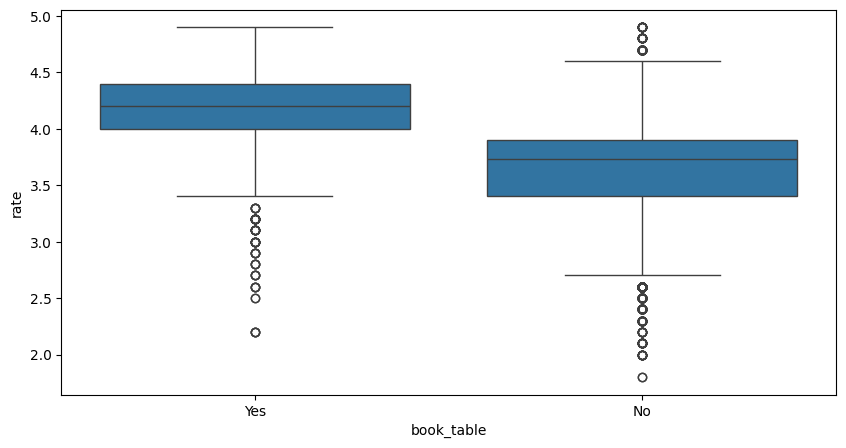

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.book_table,y=df.rate)

avg rating of rest. having book table facility is also higher

**Visualizing each location & online order facility :**

(helpful to spot locations with high rest number but less online order facility to open new rest. of this type and fill the gap in the market)

In [44]:
df.groupby(["location","online_order"])["name"].count()

location               online_order
BTM                    No               802
                       Yes             1682
Banashankari           No               260
                       Yes              311
Bannerghatta Road      No               399
                       Yes              653
Bellandur              No               437
                       Yes              683
Brigade Road           No               293
                       Yes              394
Brookefield            No               206
                       Yes              392
Electronic City        No               657
                       Yes              555
HSR                    No               438
                       Yes             1315
Indiranagar            No               647
                       Yes             1100
JP Nagar               No               562
                       Yes              838
Jayanagar              No               380
                       Yes              

<Axes: xlabel='location'>

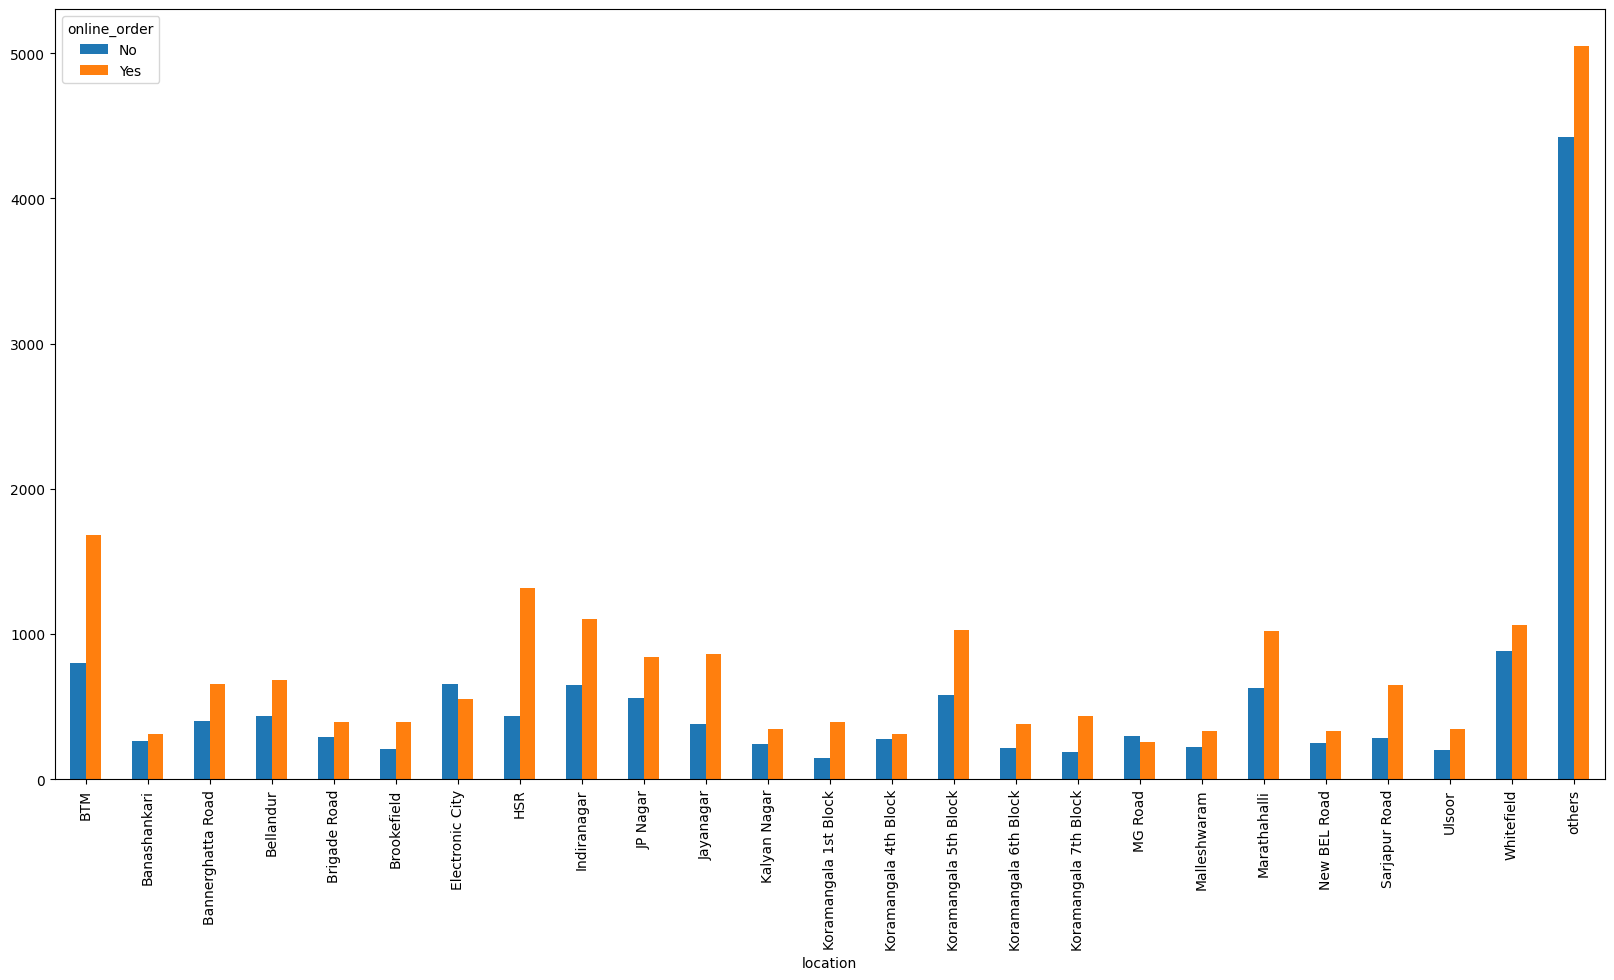

In [45]:
loc_onl=df.groupby(["location","online_order"])["name"].count()
loc_onl = loc_onl.unstack()
loc_onl.plot(kind="bar",figsize=(20,10))

**Visualizing each location & book table facility :**

In [46]:
df.groupby(["location","book_table"])["name"].count()

location               book_table
BTM                    No            2358
                       Yes            126
Banashankari           No             528
                       Yes             43
Bannerghatta Road      No             973
                       Yes             79
Bellandur              No            1024
                       Yes             96
Brigade Road           No             541
                       Yes            146
Brookefield            No             525
                       Yes             73
Electronic City        No            1116
                       Yes             96
HSR                    No            1566
                       Yes            187
Indiranagar            No            1310
                       Yes            437
JP Nagar               No            1148
                       Yes            252
Jayanagar              No            1015
                       Yes            227
Kalyan Nagar           No             466


<Axes: xlabel='location'>

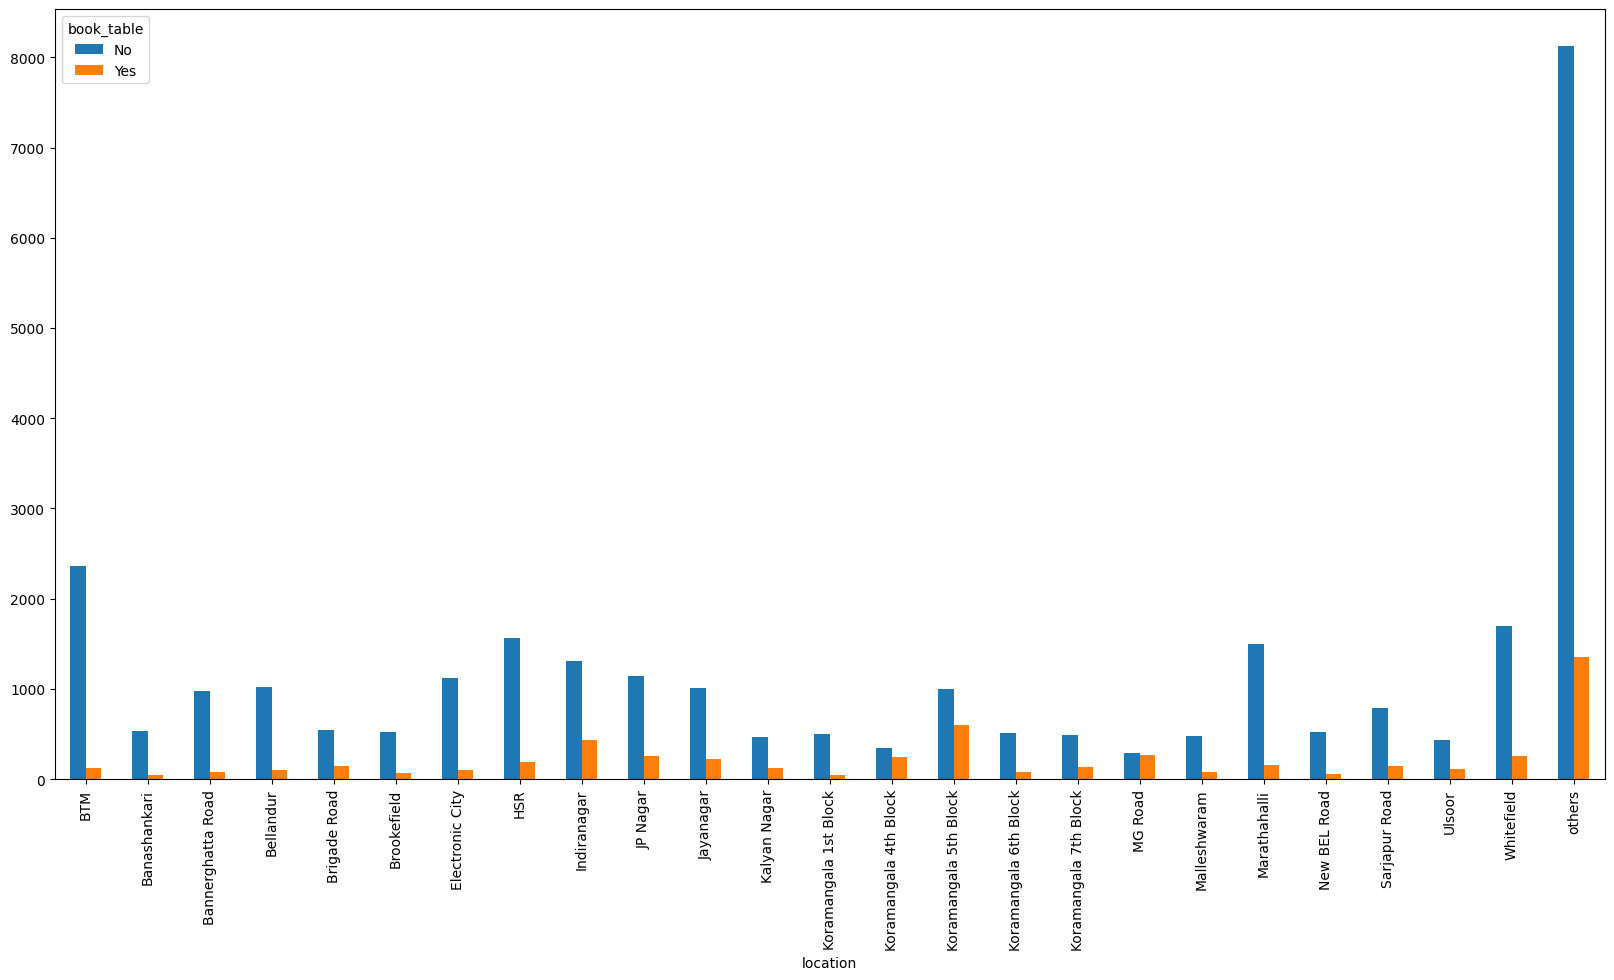

In [47]:
loc_booktable=df.groupby(["location","book_table"])["name"].count()
loc_booktable=loc_booktable.unstack()
loc_booktable.plot(kind="bar",figsize=(20,10))

**Visualizing each location & type of rest. :**

<Axes: xlabel='location'>

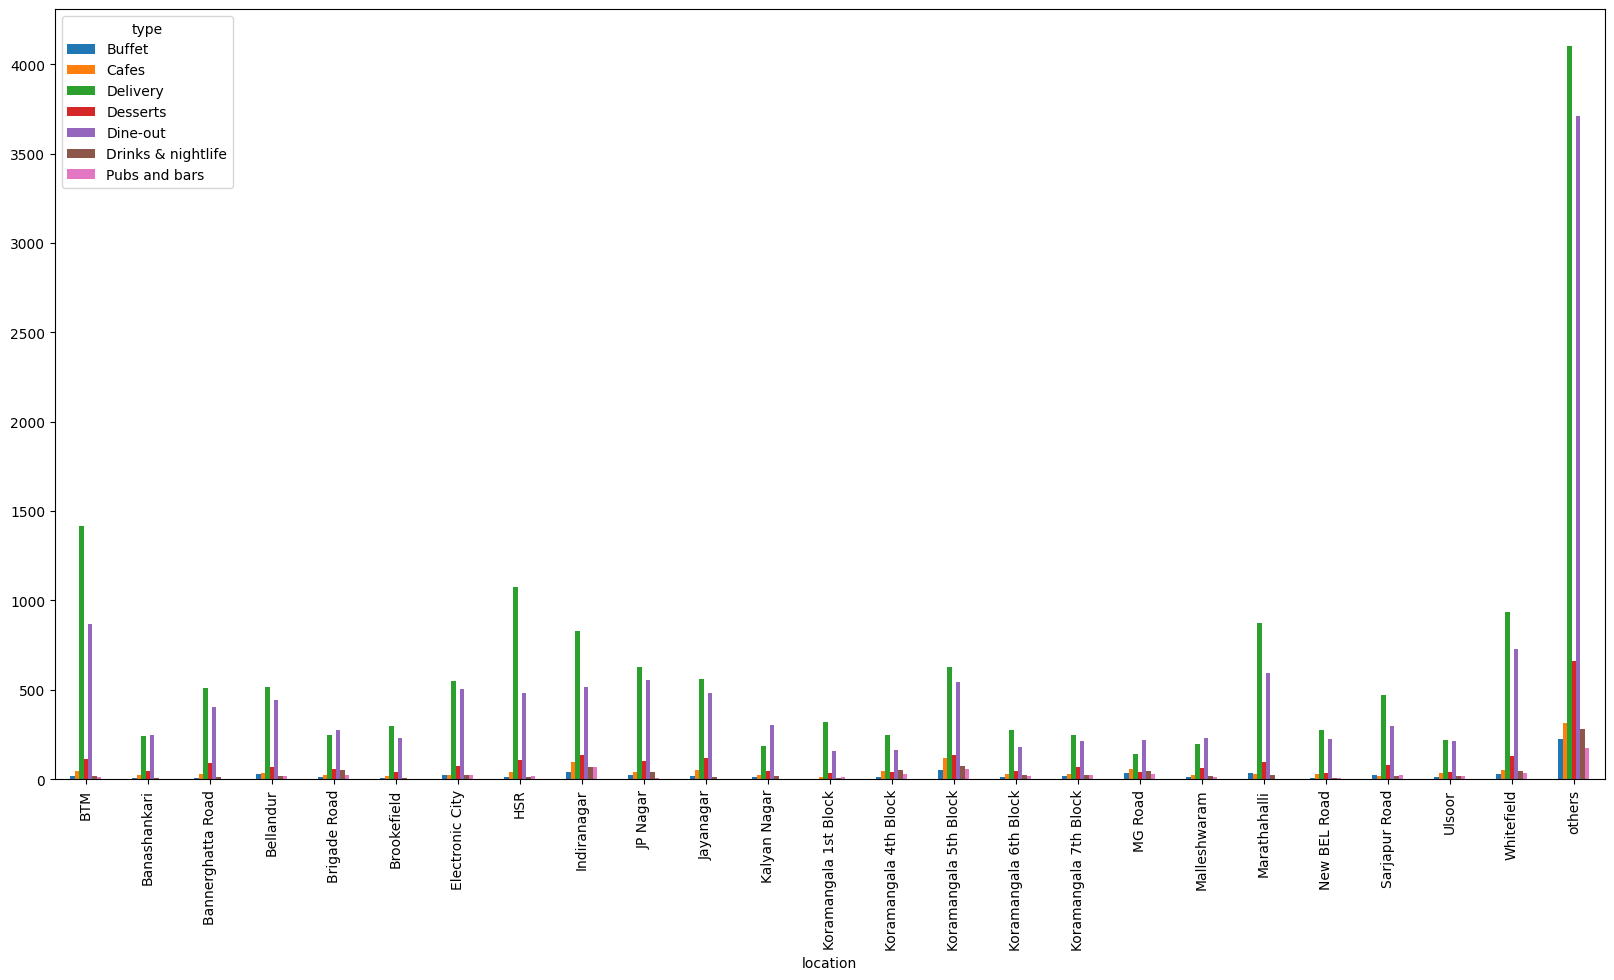

In [48]:
loc_type=df.groupby(["location","type"])["name"].count()
loc_type=loc_type.unstack()
loc_type.plot(kind="bar",figsize=(20,10))

**Type of rest. vs Rating of rest. :**

<Axes: xlabel='type', ylabel='rate'>

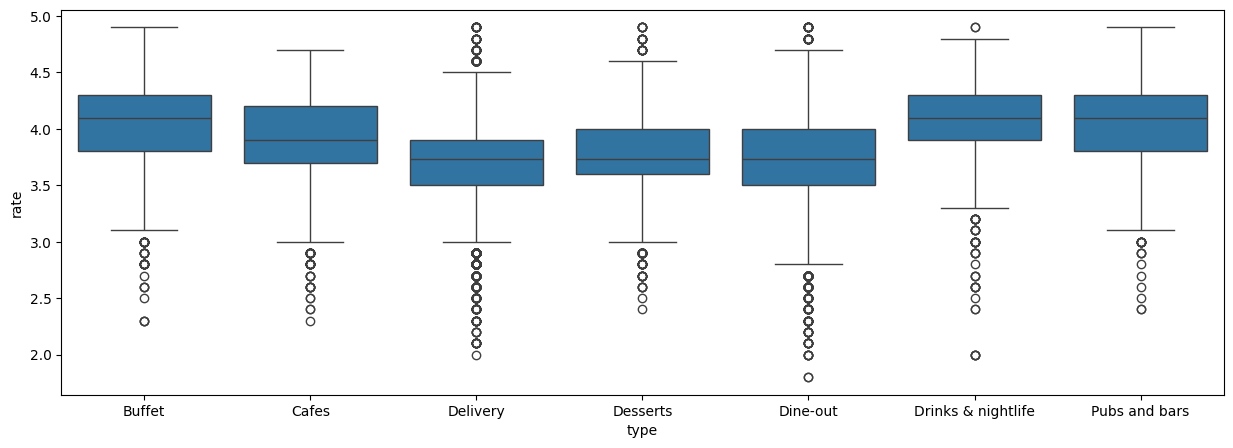

In [49]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.type,y=df.rate)

people highly rate buffet,drinks & nightlife and pubs & bars type restaurants

In [50]:
#just to confirm the above=seeing avg rating for each type
df.groupby("type")["rate"].mean()

type
Buffet                4.023209
Cafes                 3.895242
Delivery              3.689331
Desserts              3.781989
Dine-out              3.708677
Drinks & nightlife    4.062818
Pubs and bars         4.034144
Name: rate, dtype: float64

**Visualizing each location vs number of reviews :**

<Axes: xlabel='location'>

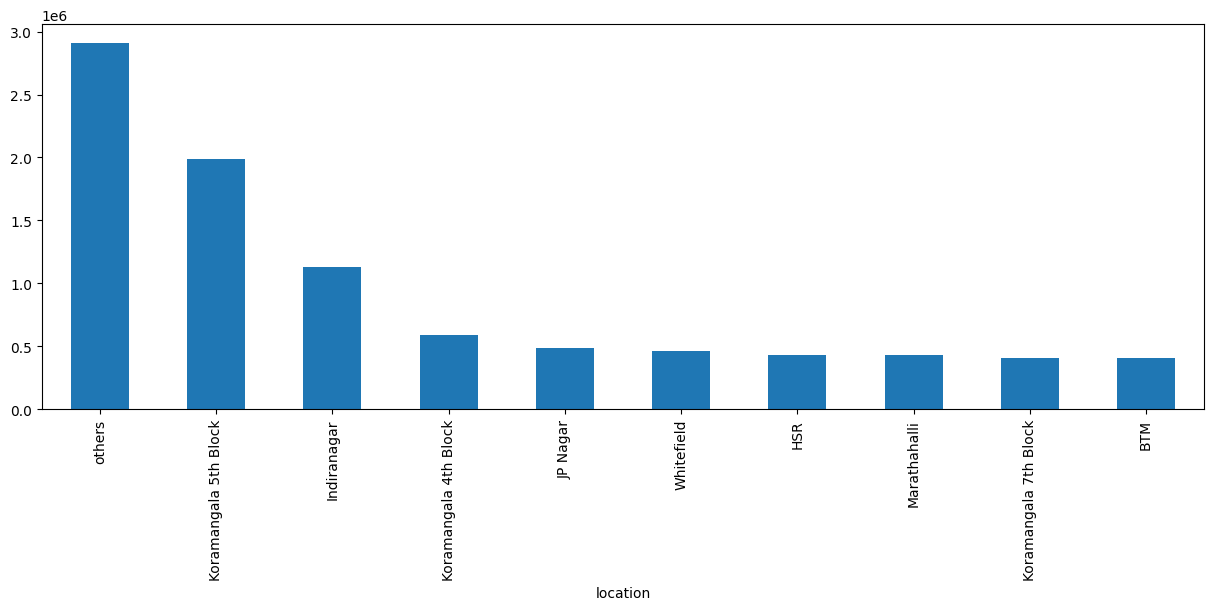

In [51]:
votes_in_loc=df.groupby(["location"])["votes"].sum().sort_values(ascending=False).head(10)
votes_in_loc.plot(kind="bar",x="location",y="votes",figsize=(15,5))
#sorted in descending order of sum of votes for each location

Koramangala 5th block,indiranagar are the highest voted locations 
Possible reasons are more population in these area,more people people going the these areas,more interactive customers,some incentive given by restaurants to rate them

**Visualizing top cuisines :**

<Axes: xlabel='cuisines'>

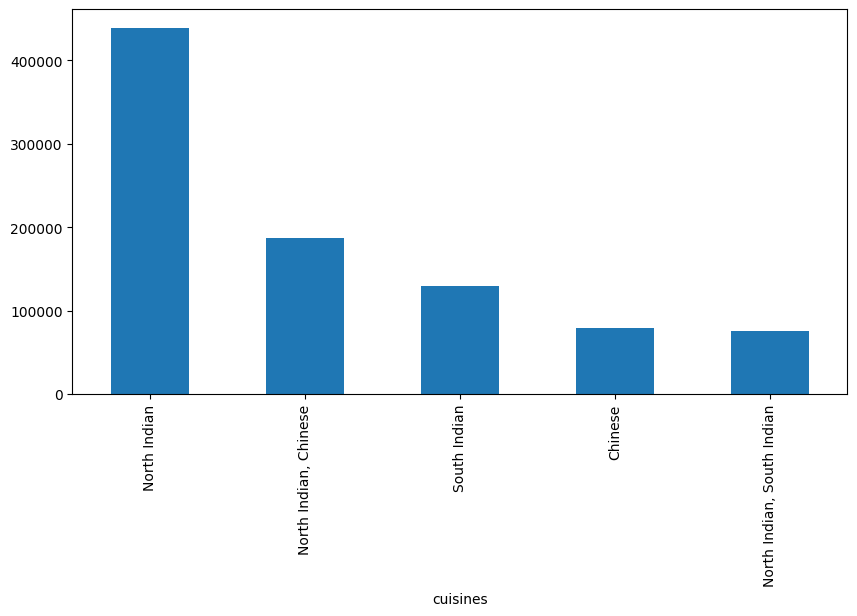

In [52]:
cuisine_votes=df.groupby(["cuisines"])["votes"].sum().sort_values(ascending=False).iloc[1:6]
cuisine_votes.plot(kind="bar",figsize=(10,5))
#"others" was at the top so removed it with iloc[1:6] to get the next 5 cuisines